Total RUL values: 259
RUL min: 6.0, max: 194.0, mean: 81.18532818532819
Number of outliers: 0
Outliers: []


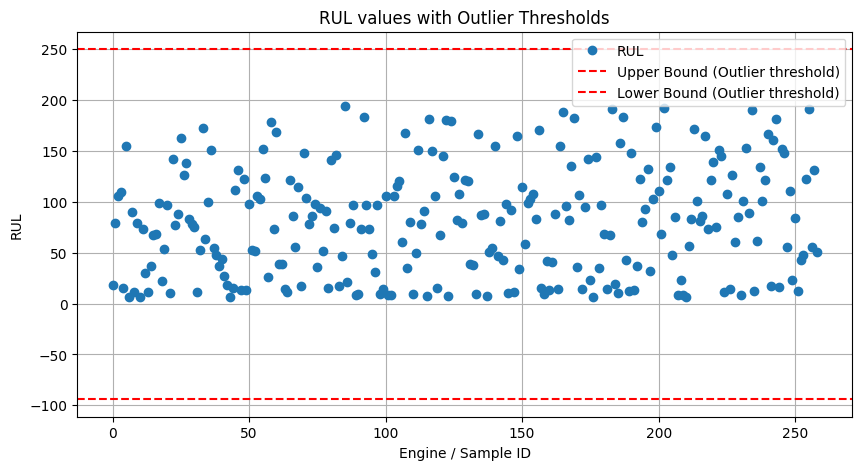

Suggested RUL clip value: 194


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load RUL values from text file
rul_path = "data/RUL_FD002.txt"
rul_values = np.loadtxt(rul_path)

print(f"Total RUL values: {len(rul_values)}")
print(f"RUL min: {rul_values.min()}, max: {rul_values.max()}, mean: {rul_values.mean()}")

# -----------------------------
# Detect outliers using IQR
# -----------------------------
Q1 = np.percentile(rul_values, 25)
Q3 = np.percentile(rul_values, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = rul_values[(rul_values < lower_bound) | (rul_values > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
print(f"Outliers: {outliers}")

# -----------------------------
# Plot RUL values
# -----------------------------
plt.figure(figsize=(10,5))
plt.plot(rul_values, marker='o', linestyle='None', label="RUL")
plt.axhline(upper_bound, color='r', linestyle='--', label="Upper Bound (Outlier threshold)")
plt.axhline(lower_bound, color='r', linestyle='--', label="Lower Bound (Outlier threshold)")
plt.xlabel("Engine / Sample ID")
plt.ylabel("RUL")
plt.title("RUL values with Outlier Thresholds")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# Suggest RUL clipping
# -----------------------------
# Option: Use max RUL below upper outlier threshold
rul_clip = int(min(rul_values.max(), upper_bound))
print(f"Suggested RUL clip value: {rul_clip}")


In [ ]:
threshold = 180

count_more = np.sum(rul_values > threshold)
count_less_equal = np.sum(rul_values <= threshold)

print(f"Values > {threshold}: {count_more}")
print(f"Values <= {threshold}: {count_less_equal}")


Values > 180: 11
Values <= 180: 248
